In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from global_settings import * 
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

In [2]:
run="run3"
ratio="0.6"

if(run=="run1"):
    run_flag = "Run 1"
else:
    run_flag = "Run 3"

In [3]:
base_bkg = "/home/lmlepin/Desktop/dm_sets/dark_tridents_analysis/{}_samples/".format(run)
base_signal = "/home/lmlepin/Desktop/dm_sets/dark_tridents_analysis/{}_signal/".format(run)
figs_dir = "/home/lmlepin/Desktop/Plots_DT_Drive/2023/CNN_plots/"

In [4]:
df_nu = pd.read_csv(base_bkg + run + "_nu_overlay_CNN_scores_8441_steps.csv")
df_dirt = pd.read_csv(base_bkg + run + "_dirt_CNN_scores_8441_steps.csv")
df_offbeam = pd.read_csv(base_bkg + run + "_offbeam_CNN_scores_8441_steps.csv")

print(len(df_nu))
print(len(df_dirt))
print(len(df_offbeam))

11532
2413
16192


In [5]:
df_final = df_nu.append(df_dirt,ignore_index=True)
df_final = df_final.append(df_offbeam,ignore_index=True)
df_final = df_final[df_final['signal_score'] >= 0.]

In [6]:
masses = mass_dic[ratio]
decays = ["pi0", "eta"]

In [7]:
def GetEfficiency(df,label):
    efficiency = []
    cnn_scores = [0.2]#np.linspace(0.,1.0,500)
    n_total = len(df[df['signal_score'] >= 0.])
    for score in cnn_scores:
        if(label == "background"):
            n_top = len(df[df['signal_score'] < score])
            eff_temp = n_top/n_total
            efficiency.append(eff_temp)
        elif(label == "signal"):
            n_top = len(df[df['signal_score'] >= score])
            eff_temp = n_top/n_total
            efficiency.append(eff_temp)
    return cnn_scores, efficiency

In [8]:
bkg_scores, bkg_efficiency = GetEfficiency(df_final,"background")

In [9]:
efficiency_signal = []

if(ratio=="0.6"):
    for mass in masses:
        if(float(mass) >= 0.02 and float(mass) <= 0.09):
            df_signal = pd.DataFrame()
            for dmode in decays:
                df_temp = pd.read_csv(base_signal + "{}_dt_ratio_{}_{}_{}_CNN_scores_8441_steps.csv".format(run,ratio,mass,dmode))
                df_signal = df_signal.append(df_temp, ignore_index=True)
            df_signal = df_signal[df_signal['signal_score'] >= 0.]
            signal_scores, temp_eff = GetEfficiency(df_signal,label="signal")
            efficiency_signal.append(temp_eff)
        if(float(mass) == 0.01):
            df_signal = pd.DataFrame()
            dmode = "pi0"
            df_signal = pd.read_csv(base_signal + "{}_dt_ratio_{}_{}_{}_CNN_scores_8441_steps.csv".format(run,ratio,mass,dmode))
            df_signal = df_signal[df_signal['signal_score'] >= 0.]
            signal_scores, temp_eff = GetEfficiency(df_signal,label="signal")
            efficiency_signal.append(temp_eff)
        if(float(mass) >= 0.1):
            df_signal = pd.DataFrame()
            dmode = "eta"
            df_signal = pd.read_csv(base_signal + "{}_dt_ratio_{}_{}_{}_CNN_scores_8441_steps.csv".format(run,ratio,mass,dmode))
            df_signal = df_signal[df_signal['signal_score'] >= 0.]
            signal_scores, temp_eff = GetEfficiency(df_signal,label="signal")
            efficiency_signal.append(temp_eff)
    
else:
    for mass in masses:
        if(float(mass) <= 0.030):
            df_signal = pd.DataFrame()
            for dmode in decays:
                df_temp = pd.read_csv(base_signal + "{}_dt_ratio_{}_{}_{}_CNN_scores_8441_steps.csv".format(run,ratio,mass,dmode))
                df_signal = df_signal.append(df_temp, ignore_index=True)
            df_signal = df_signal[df_signal['signal_score'] >= 0.]
            signal_scores, temp_eff = GetEfficiency(df_signal,label="signal")
            efficiency_signal.append(temp_eff)
        else:
            df_signal = pd.DataFrame()
            dmode = "eta"
            df_signal = pd.read_csv(base_signal + "{}_dt_ratio_{}_{}_{}_CNN_scores_8441_steps.csv".format(run,ratio,mass,dmode))
            df_signal = df_signal[df_signal['signal_score'] >= 0.]
            signal_scores, temp_eff = GetEfficiency(df_signal,label="signal")
            efficiency_signal.append(temp_eff)
            
            
        

In [10]:
for eff in efficiency_signal:
    print(eff)

[0.9014053818498747]
[0.9241963026208331]
[0.9220396433571586]
[0.9230892485178658]
[0.9206349206349206]
[0.9211237611598001]
[0.9219139249205395]
[0.9219759926131117]
[0.9214757906021083]
[0.9187047881501894]
[0.8995904995904996]
[0.8669039145907473]
[0.8661356628982528]


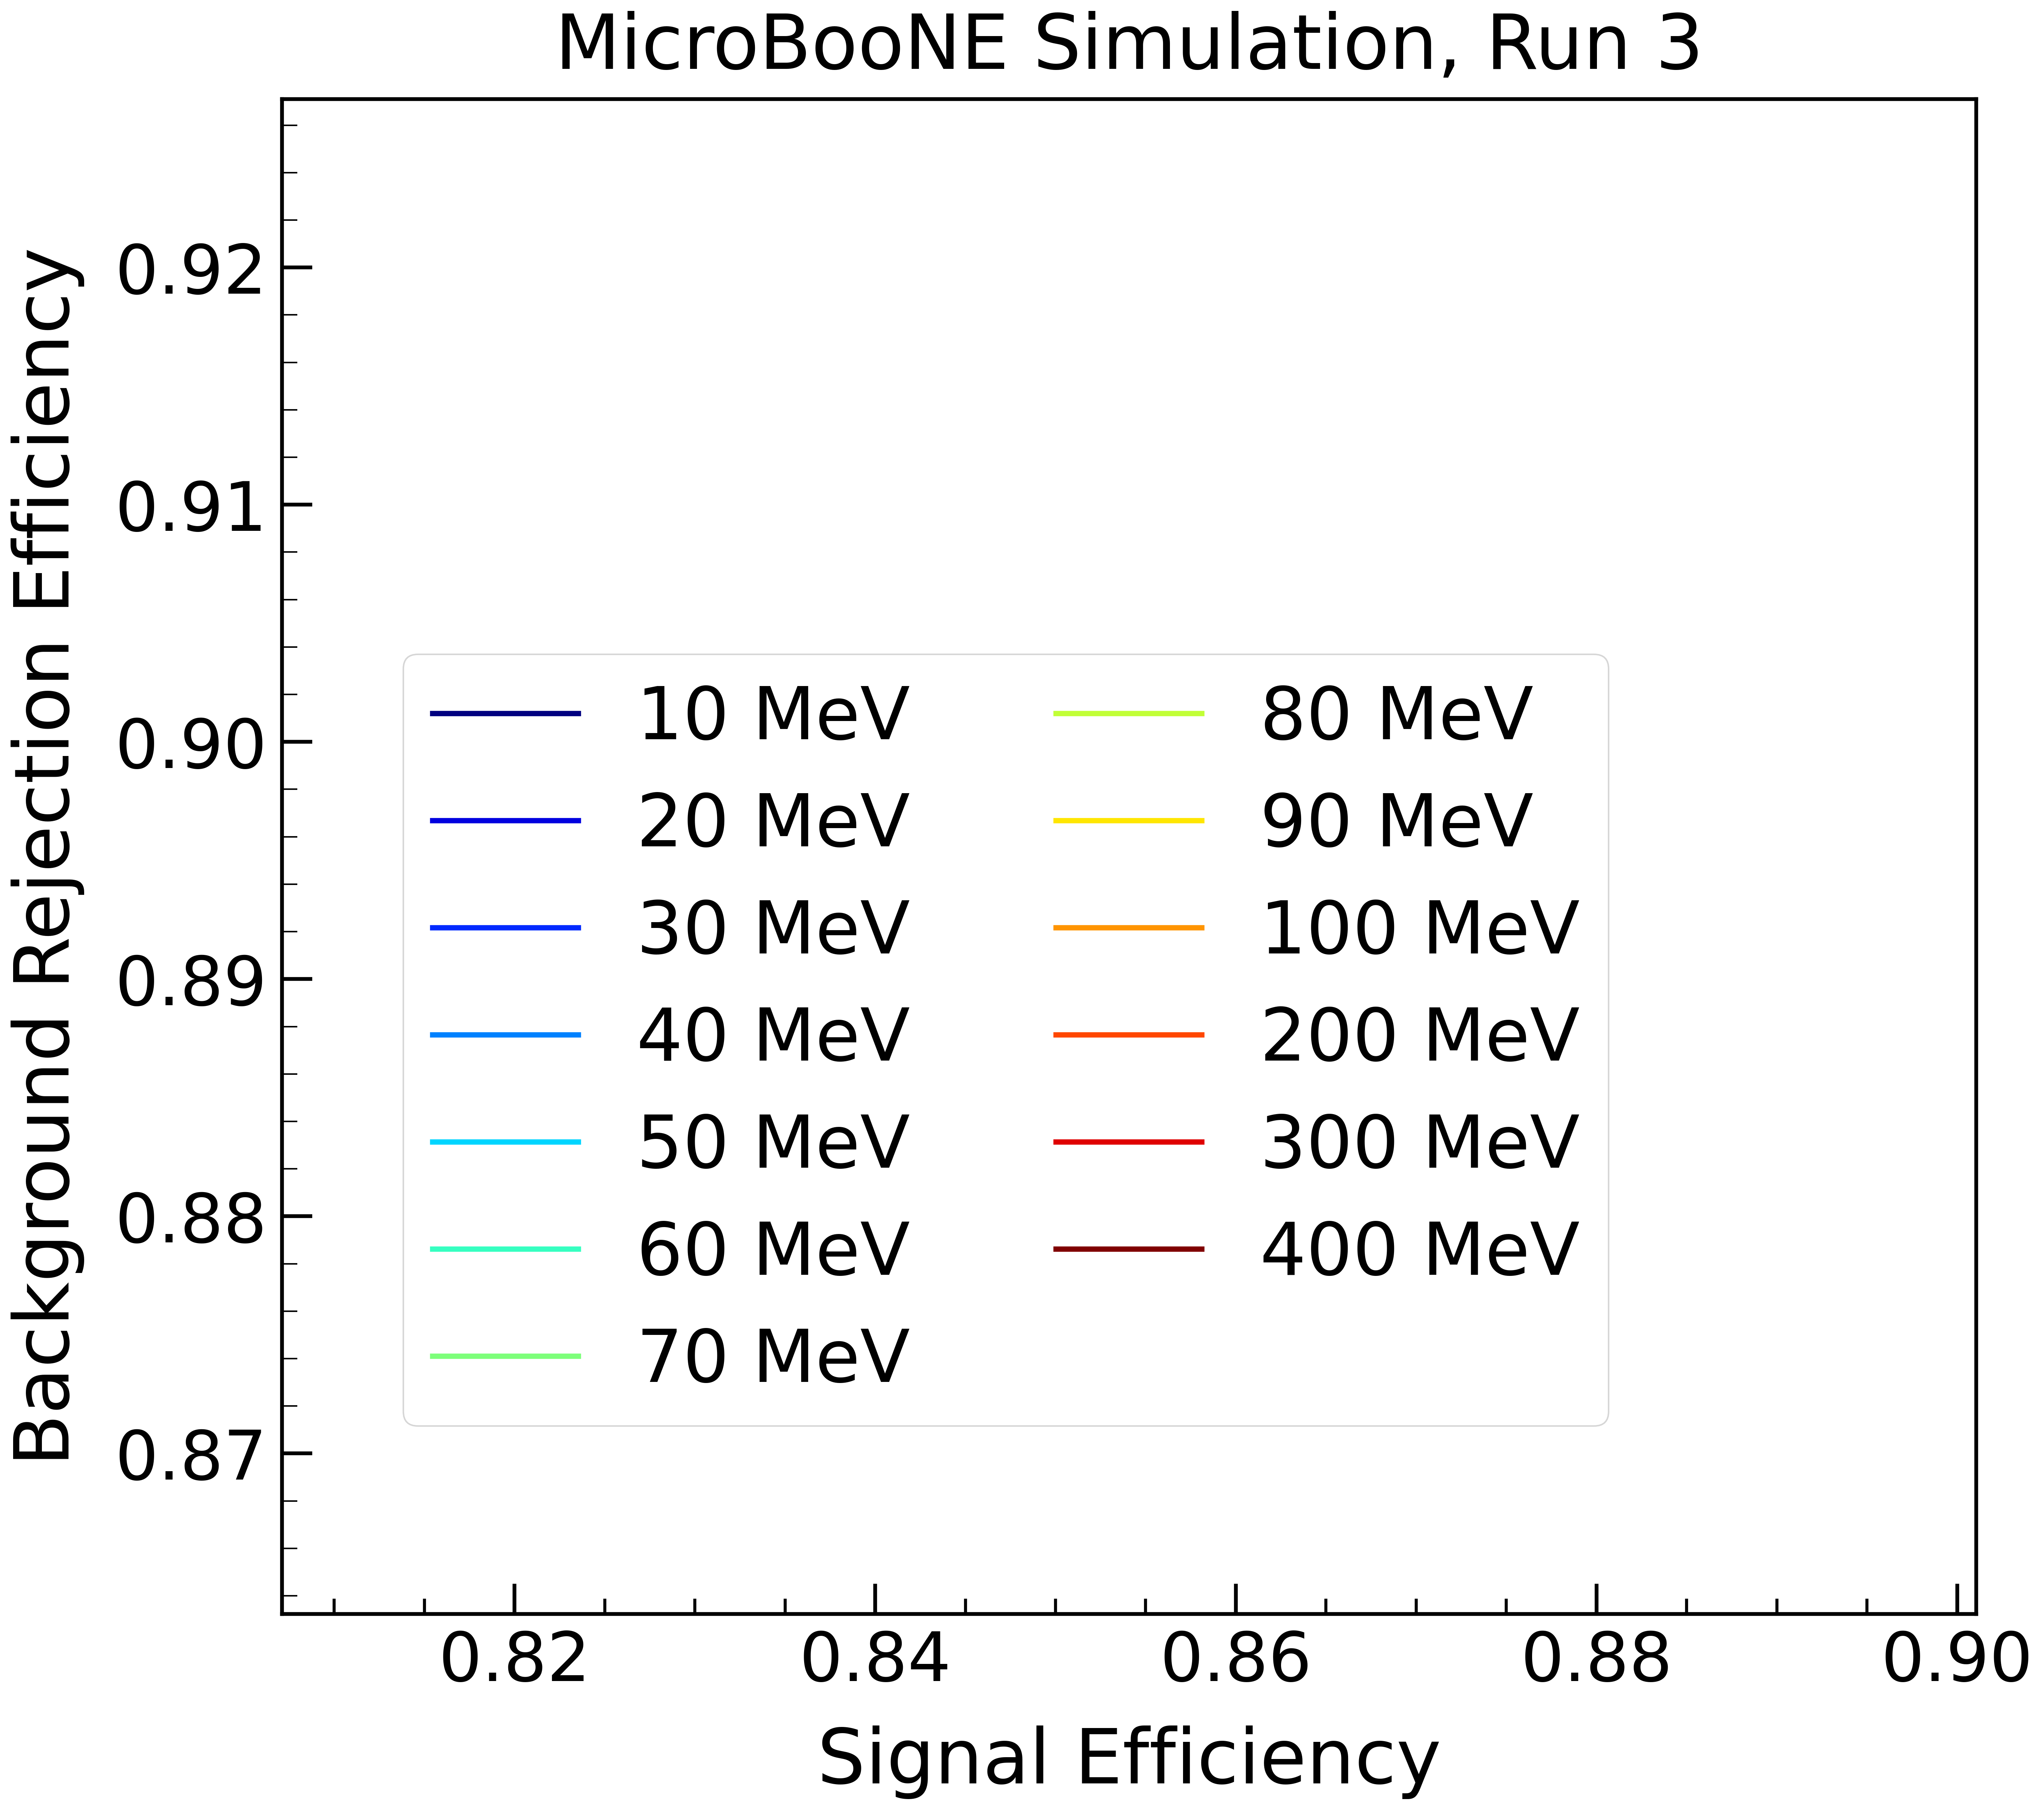

In [11]:
colors = plt.cm.jet(np.linspace(0,1,len(masses)))
index_help = 0

from scipy import integrate

figure_size = (20,18)
fig = plt.figure(figsize=figure_size,dpi=300)
ax = fig.add_subplot(111)

for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(2.5)  # change width
    ax.spines[axis].set_color('black')    # change color
    
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

for eff in efficiency_signal:
    integral = integrate.simpson(eff,bkg_efficiency)
    if(ratio=="0.6"):
        label_plot = "{} MeV".format(int(1000*float(masses[index_help])))
    else:
        label_plot = "{} MeV".format(int(1000*float(masses[index_help])))
    plt.plot(bkg_efficiency,eff,ls='-',color=colors[index_help], label=label_plot,lw=3.5)
    index_help+=1
    
#plt.axvline(0.5,color='black',ls="--",lw=3.5)
plt.title(r"MicroBooNE Simulation, {}".format(run_flag),fontsize=50,pad=20)
plt.ylabel("Background Rejection Efficiency",fontsize=50,labelpad=20)
plt.xlabel("Signal Efficiency",fontsize=50,labelpad=20)
plt.tick_params(axis="y", which='major', direction="in",length=20,width=2.5,pad=10)
plt.tick_params(axis="y", which='minor', direction="in",length=10,width=1.0,labelleft=False)
plt.tick_params(axis="x", which='major', direction="in",length=20,width=2.5,pad=10)
plt.tick_params(axis="x", which='minor', direction="in",length=10,width=2.0,labelbottom=False)
plt.xticks(fontsize=45)
plt.yticks(fontsize=45)

if(ratio=="0.6"):
    plt.legend(fontsize=48,ncol=2,loc='lower left',bbox_to_anchor=[0.05,0.1])
else:
    plt.legend(fontsize=35,ncol=3,loc='lower left',bbox_to_anchor=[0.05,0.1])
plt.savefig(figs_dir + "ROC_curve_mass_points_{}_ratio_{}.pdf".format(run,ratio),bbox_inches="tight")
plt.savefig(figs_dir + "ROC_curve_mass_points_{}_ratio_{}.png".format(run,ratio),bbox_inches="tight")
plt.show()